Training with batch size 16
Epoch 1/20


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1285326.6250 - val_loss: 9794.7402
Epoch 2/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 1948.7820 - val_loss: 89.6586
Epoch 3/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 1345.7347 - val_loss: 71.6949
Epoch 4/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 243.2885 - val_loss: 51.4012
Epoch 5/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 319.5755 - val_loss: 60.5183
Epoch 6/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - loss: 671.3702 - val_loss: 46.1362
Epoch 7/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 1210.0928 - val_loss: 37.2778
Epoch 8/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 530.7098 - val_loss: 37.2413
Epoch 9/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 315.5741 - val_loss: 34.6448
Epoch 10/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 186.4212 - val_loss: 31.9613
Epoch 11/20
865/865 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 592.5319 - val_loss: 30.2394
Epoch

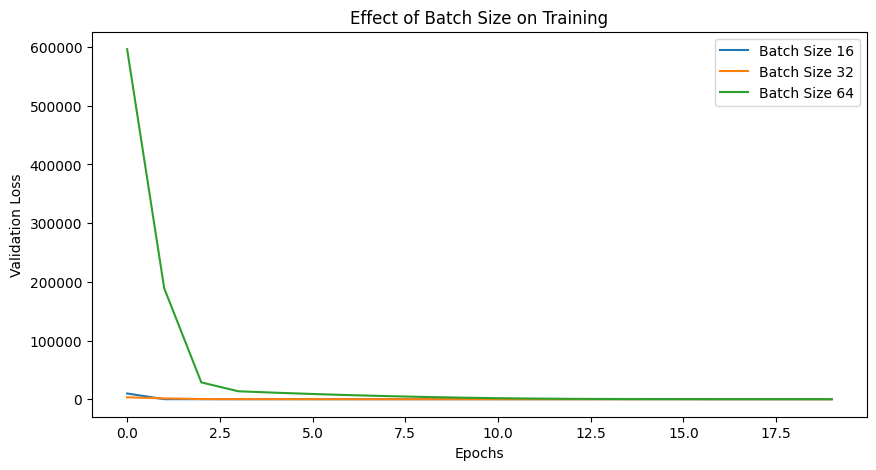

Batch Size 16: ~864 mini-batches per epoch
Batch Size 32: ~432 mini-batches per epoch
Batch Size 64: ~216 mini-batches per epoch


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import os

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
housing_data = pd.DataFrame(data.data, columns=data.feature_names)

X = housing_data.iloc[:, :-1].values 
y = housing_data.iloc[:, -1].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


def create_model():
    model = Sequential([
        Dense(1, input_shape=(X_train.shape[1],))  
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
    return model

batch_sizes = [16, 32, 64]
loss_histories = {}

for batch_size in batch_sizes:
    print(f"Training with batch size {batch_size}")
    model = create_model()
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, verbose=1)
    loss_histories[batch_size] = history.history

plt.figure(figsize=(10, 5))
for batch_size, history in loss_histories.items():
    plt.plot(history['val_loss'], label=f'Batch Size {batch_size}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Effect of Batch Size on Training')
plt.show()

for batch_size in batch_sizes:
    num_batches = len(X_train) // batch_size
    print(f"Batch Size {batch_size}: ~{num_batches} mini-batches per epoch")
